# View

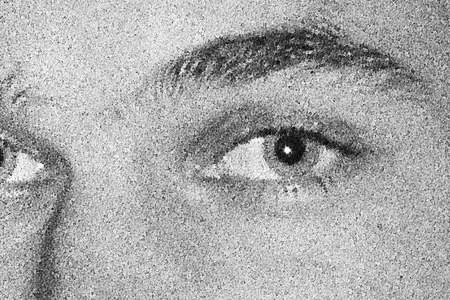

In [1]:
from PIL import Image
img=Image.open('eye.png')
img=img.convert('L')
img

# Flip

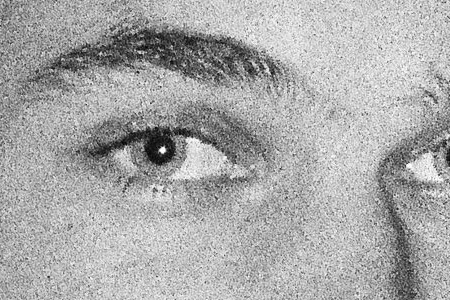

In [2]:
def flip(img):
    #get the width height from image
    width,height=img.size
    #get the copy of the image
    copyimg=img.copy()
    #get the pixel of each image
    moriginal=img.load()
    mcopy=copyimg.load()
    #
    for i in range(width):
        for j in range(height):
            mcopy[i,j]=moriginal[width-i-1,j]
    
    return copyimg
    
    
img=flip(img)
img

# Blur

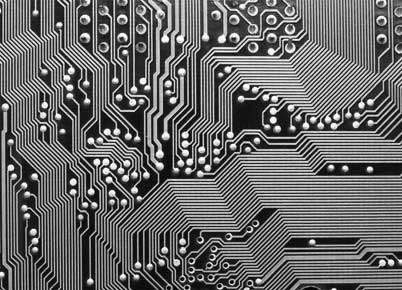

In [3]:
img=Image.open('pcb.png')
img=img.convert('L')
img

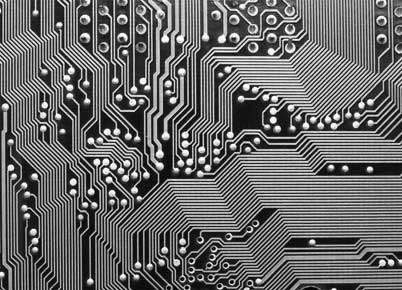

In [4]:
#blur
def blur(img):
    #get the width of the image
    width,height=img.size
    copyimg=img.copy()
    mcopyimg=copyimg.load()
    
    for i in range(width):
        for j in range(height):
            r=region3x3(img,i,j)
            mcopyimg[i,j]=avg(r)
        
    return copyimg  

def avg(data):
    return int(sum(data)/len(data))

def region3x3(img,x,y):
    center = getpixel(img, x, y)
    N = getpixel(img, x, y - 1)
    NE=getpixel(img, x+1, y - 1)
    NW=getpixel(img, x-1, y - 1)
    S = getpixel(img, x, y +1)
    SE=getpixel(img, x+1, y + 1)
    SW=getpixel(img, x-1, y + 1)
    W= getpixel(img, x-1, y)
    E= getpixel(img, x+1, y)
    
    return [center,N,NE,NW,S,SE,SW,W,E]

def getpixel(img,x,y):
    width,height=img.size
    pixel=img.load()
    
    if x<0:
        x=0
    elif x>=width:
        x=width-1
    
    if y<0:
        y=0
    elif y>=height:
        y=height-1
        
    return pixel[x,y]
    
img=Image.open('pcb.png')
img=img.convert('L')
img

# Denoise

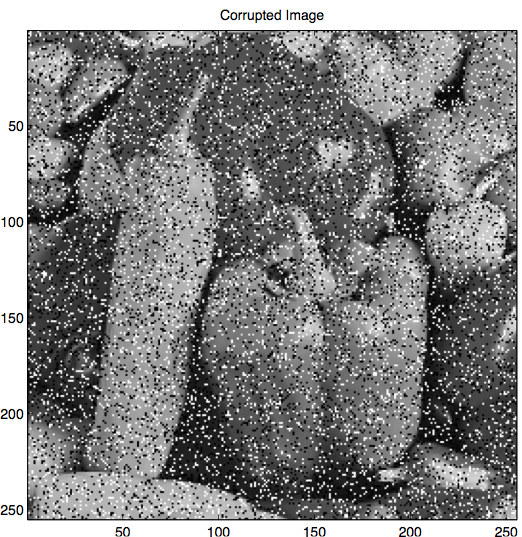

In [16]:
def denoise(img):
    #get the width of the image
    width,height=img.size
    copyimg=img.copy()
    mcopyimg=copyimg.load()
    
    for i in range(width):
        for j in range(height):
            r=region3x3(img,i,j)
            mcopyimg[i,j]=median(r)
        
    return copyimg    

def median(data):
    data_sort=sorted(data)
    data_length=len(data)
    if data_length%2==1:
        middle=int(round(data_length/2))+1
    else:
        middle=int(round(data_length/2))
    
    return data_sort[middle-1]
img=Image.open('Veggies_noise.jpg')
img

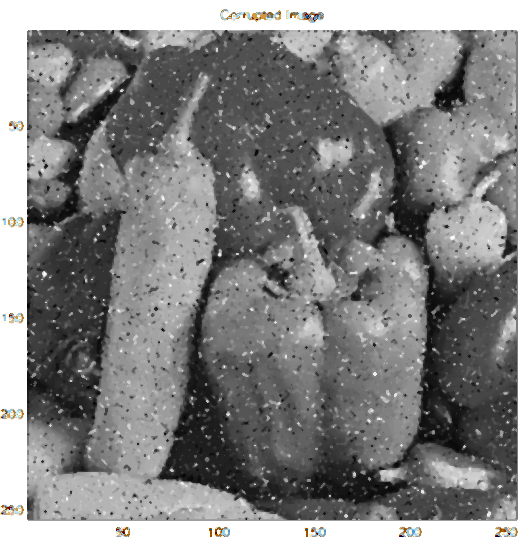

In [19]:
img=Image.open('Veggies_noise.jpg')
img=denoise(img)
img=denoise(img)
img

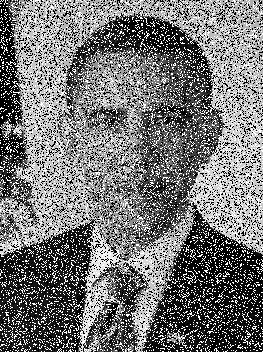

In [5]:
img=Image.open('guesswho.png')
img

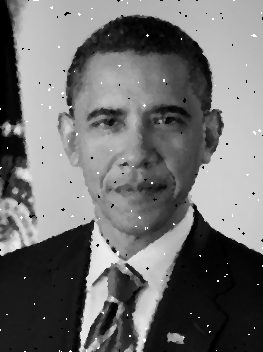

In [6]:
img=Image.open('guesswho.png')
img=denoise(img)
img=denoise(img)
img


# Generic Filter

In [7]:
def open(fname):
    img = Image.open(fname)
    img = img.convert("L")
    return img

def filter(image, f):
    
    #get the width of the image
    width,height=img.size
    copyimg=img.copy()
    mcopyimg=copyimg.load()
    
    for i in range(width):
        for j in range(height):
            r=region3x3(img,i,j)
            mcopyimg[i,j]=f(r)
        
    return copyimg 


## Blur refactored

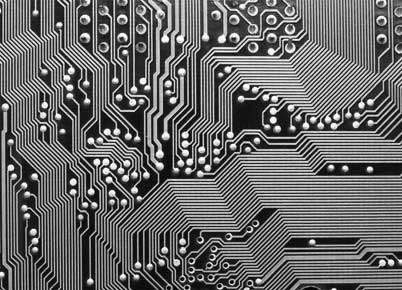

In [8]:
img=open('pcb.png')
img

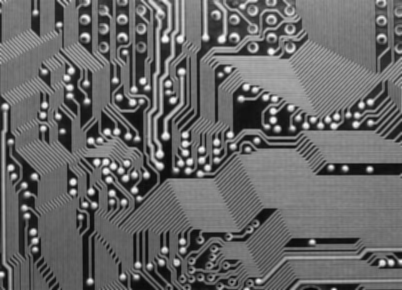

In [9]:
img=filter(img,avg)
img

## Denoise refactored

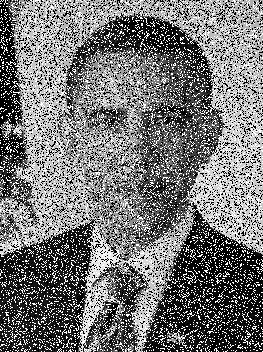

In [10]:
img=open('guesswho.png')
img

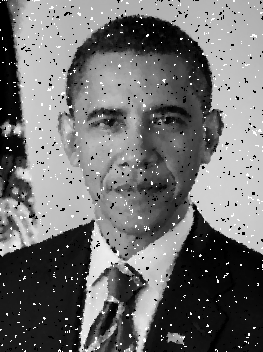

In [11]:
img=filter(img,median)
img

# Edges

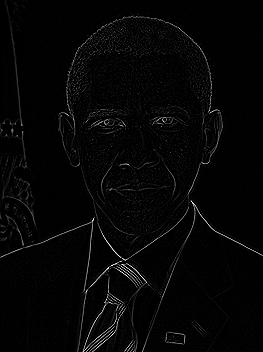

In [12]:

def laplace(data):
    return (data[1]+data[4]+data[7]+data[8])-4*data[0]

img=open('obama.png')
img=filter(img,laplace)
img

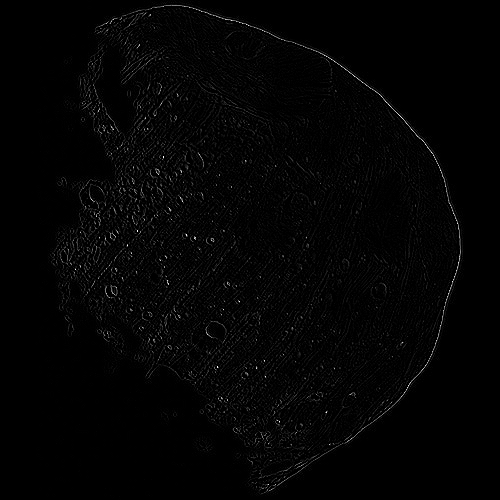

In [13]:
img=open('phobos2.jpg')
img=filter(img,laplace)
img

# Sharpen

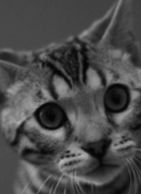

In [20]:
def minus(A,B):
    pixelA=A.load()
    pixelB=B.load()
    copyA=A.copy()
    pixelcopy=copyA.load()
    width,height=A.size
    
    for i in range(width):
        for j in range(height):
            pixelcopy[i,j]=pixelA[i,j]-pixelB[i,j]

    return copyA


img=open('bonkers.png')
img

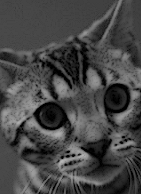

In [21]:
edges = filter(img, laplace)
img=minus(img,edges)
img

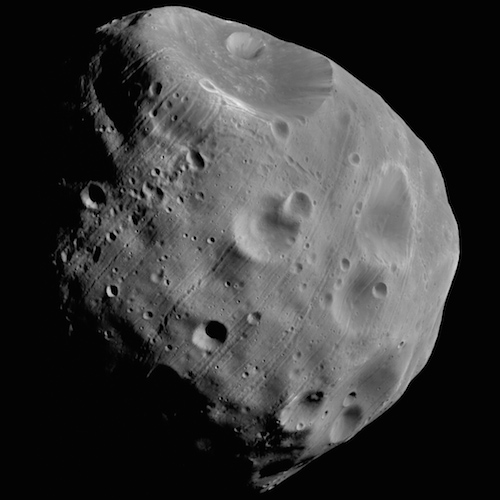

In [22]:
img=open('phobos2.jpg')
img

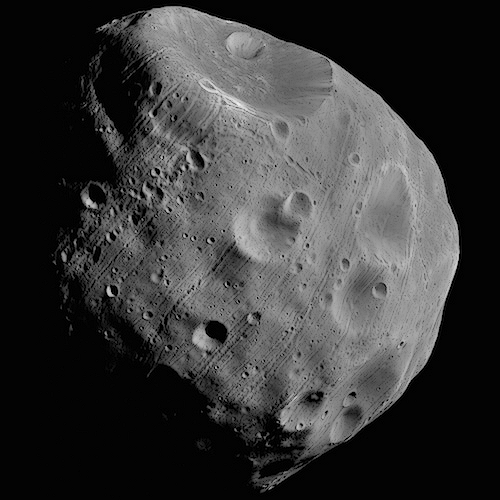

In [15]:
edges = filter(img, laplace)
img=minus(img,edges)
img